In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pyusadel import DifferentialOperators, UsadelProblem, trivial_diffops

In [2]:
Nsites = 1

do = trivial_diffops()

h_x = np.array([0.25])
h_y = np.array([0.0])
h_z = np.array([0.0])
tau_sf_inv = np.array([0.1])
tau_so_inv = np.array([0.0])
D = 0
T = 0.2
Gamma = 1e-5

up = UsadelProblem(
    Nsites=1,
    diff_ops=do,
    h_x=h_x,
    h_y=h_y,
    h_z=h_z,
    tau_sf_inv=tau_sf_inv,
    tau_so_inv=tau_so_inv,
    D=D,
    T=T,
    Gamma=Gamma,
    use_dense=True,
)

up.Delta = np.array([1])

In [3]:
# Execute a self-consistent calculation to determine the gap Delta
up.solve_self_consistent(verbose=True)

  1    Max Delta: 1.099    Residual: 9.03e-02    Free energy: -8.16e-01
  2    Max Delta: 1.190    Residual: 7.60e-02    Free energy: -9.01e-01
  3    Max Delta: 1.271    Residual: 6.37e-02    Free energy: -9.70e-01
  4    Max Delta: 1.342    Residual: 5.29e-02    Free energy: -1.02e+00
  5    Max Delta: 1.403    Residual: 4.37e-02    Free energy: -1.06e+00
  6    Max Delta: 1.455    Residual: 3.59e-02    Free energy: -1.09e+00
  7    Max Delta: 1.499    Residual: 2.94e-02    Free energy: -1.11e+00
  8    Max Delta: 1.536    Residual: 2.40e-02    Free energy: -1.13e+00
  9    Max Delta: 1.567    Residual: 1.96e-02    Free energy: -1.14e+00
 10    Max Delta: 1.592    Residual: 1.59e-02    Free energy: -1.15e+00
 11    Max Delta: 1.613    Residual: 1.29e-02    Free energy: -1.15e+00
 12    Max Delta: 1.630    Residual: 1.05e-02    Free energy: -1.16e+00
 13    Max Delta: 1.644    Residual: 8.47e-03    Free energy: -1.16e+00
 14    Max Delta: 1.655    Residual: 6.85e-03    Free energy: -1

In [4]:
# Solve for the spectral quantities, first define an energy axis then execute the calculation
up.set_real_omega_ax(-4, 4, 401)
up.solve_spectral(print_exit_status=False, gamma=1)

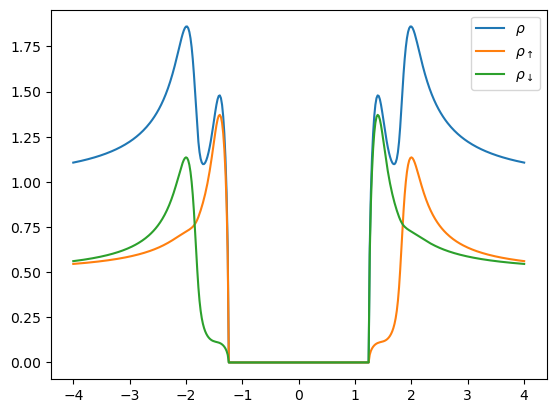

In [5]:
fig, ax = plt.subplots()
ax.plot(up.get_omega_ax_r(), up.get_ldos(), label=r"$\rho$")
ax.plot(up.get_omega_ax_r(), up.get_spin_resolved_ldos("x")[0], label=r"$\rho_\uparrow$")
ax.plot(
    up.get_omega_ax_r(), up.get_spin_resolved_ldos("x")[1], label=r"$\rho_\downarrow$"
)
ax.legend()

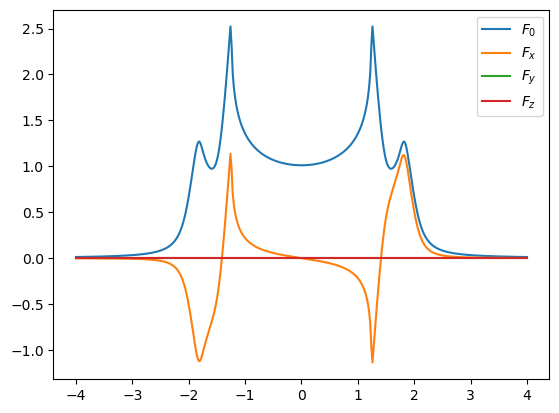

In [6]:
fig, ax = plt.subplots()
ax.plot(up.get_omega_ax_r(), up.anomalous_correlator()[0], label="$F_{0}$")
ax.plot(up.get_omega_ax_r(), up.anomalous_correlator()[1], label="$F_{x}$")
ax.plot(up.get_omega_ax_r(), up.anomalous_correlator()[2], label="$F_{y}$")
ax.plot(up.get_omega_ax_r(), up.anomalous_correlator()[3], label="$F_{z}$")
ax.legend()